# Python masterclass


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We can read the csv file, using its path in the system.
If the file does not exist we will get an error...

In [2]:
# Load the CSV file
file_path = 'books.csv'
books_df = pd.read_csv(file_path)

Now we can have a first feeling of the **books dataframe**, using the 
[`head()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) of the dataframe class.

In [3]:
# Display the first few rows of the dataframe
books_df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


Now we can gather some basic statistics [using `describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [4]:
books_df.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


So we have 350 books. How many different authors? Who wrote the most books?

In [5]:
# Number of distinct authors
num_authors = books_df['author'].nunique()

# Author(s) who authored the most books
most_books_authors = books_df['author'].value_counts().reset_index()
most_books_authors.columns = ['author', 'count']
max_books = most_books_authors['count'].max()
most_books_authors_list = most_books_authors[most_books_authors['count'] == max_books]

num_authors, most_books_authors_list


(247,
         author  count
 0  Jeff Kinney     12)

What books did "Jeff Kinney" wrote?

In [6]:
jeff_kinney_books = books_df[books_df['author'] == 'Jeff Kinney'][['name', 'year', 'rating']]
jeff_kinney_books

,name,year,rating
37,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",2011,4.8
57,"Diary of a Wimpy Kid: Hard Luck, Book 8",2013,4.8
58,Diary of a Wimpy Kid: The Last Straw (Book 3),2009,4.8
59,Diary of a Wimpy Kid: The Long Haul,2014,4.8
65,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",2009,4.8
72,Double Down (Diary of a Wimpy Kid #11),2016,4.8
179,Old School (Diary of a Wimpy Kid #10),2015,4.8
244,The Getaway,2017,4.8
278,The Meltdown (Diary of a Wimpy Kid Book 13),2018,4.8
302,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",2012,4.7


What are the worst books?

In [7]:
# Books with a rating less than 4
low_rating_books = books_df[books_df['rating'] < 4.0].sort_values(by='rating')
low_rating_books

,name,author,rating,year,genre
231,The Casual Vacancy,J.K. Rowling,3.3,2012,Fiction
101,Go Set a Watchman: A Novel,Harper Lee,3.6,2015,Fiction
87,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,2012,Fiction
20,Allegiant,Veronica Roth,3.9,2013,Fiction
251,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,2013,Fiction


## Plotting

Now we can use the (quite complicated) [matplotlib library](https://matplotlib.org/) (and [seaborn](https://seaborn.pydata.org/)) to make plot the *distribution of ratings*

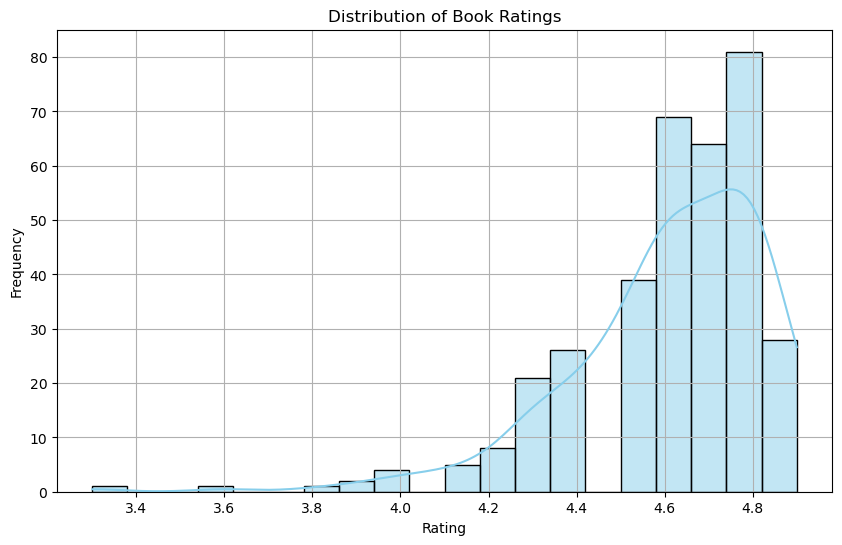

In [8]:
# We initialise a figure (passing the size)
plt.figure(figsize=(10, 6))
# Using seaborn we can quickly get the histogram passing the size of the bins
sns.histplot(books_df['rating'], bins=20, kde=True, color='skyblue')
# Final cosmetic changes
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What's the number of books per genre?

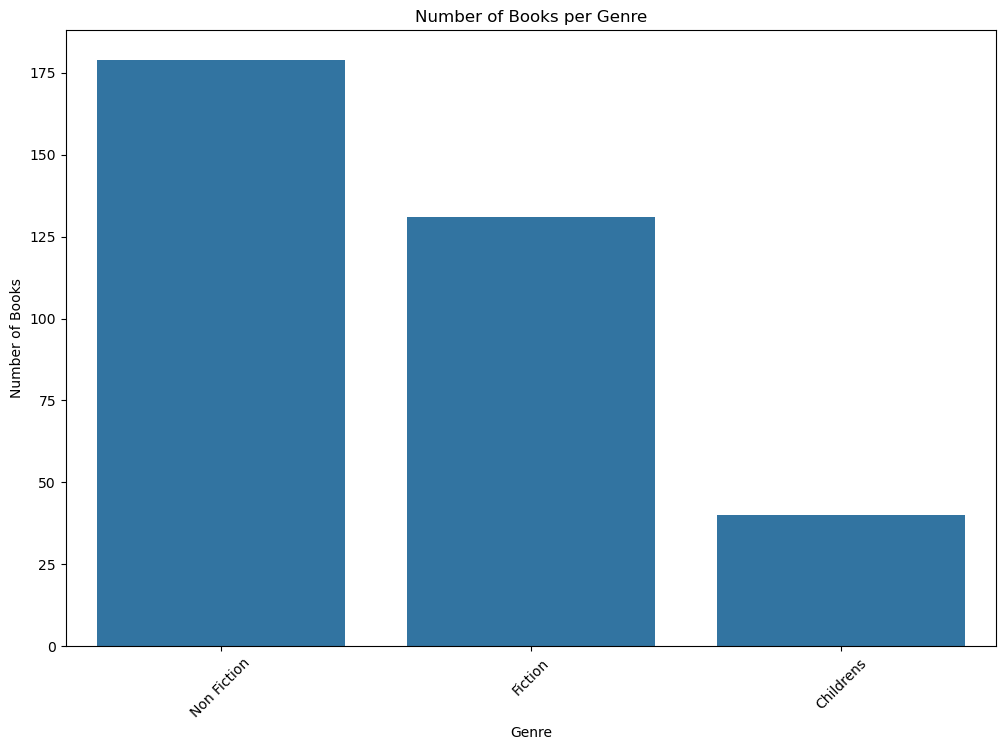

In [9]:
plt.figure(figsize=(12, 8))
genre_count = books_df['genre'].value_counts().reset_index()
genre_count.columns = ['genre', 'count']
sns.barplot(data=genre_count, x='genre', y='count')
plt.title('Number of Books per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)

plt.show()

average rating per genre

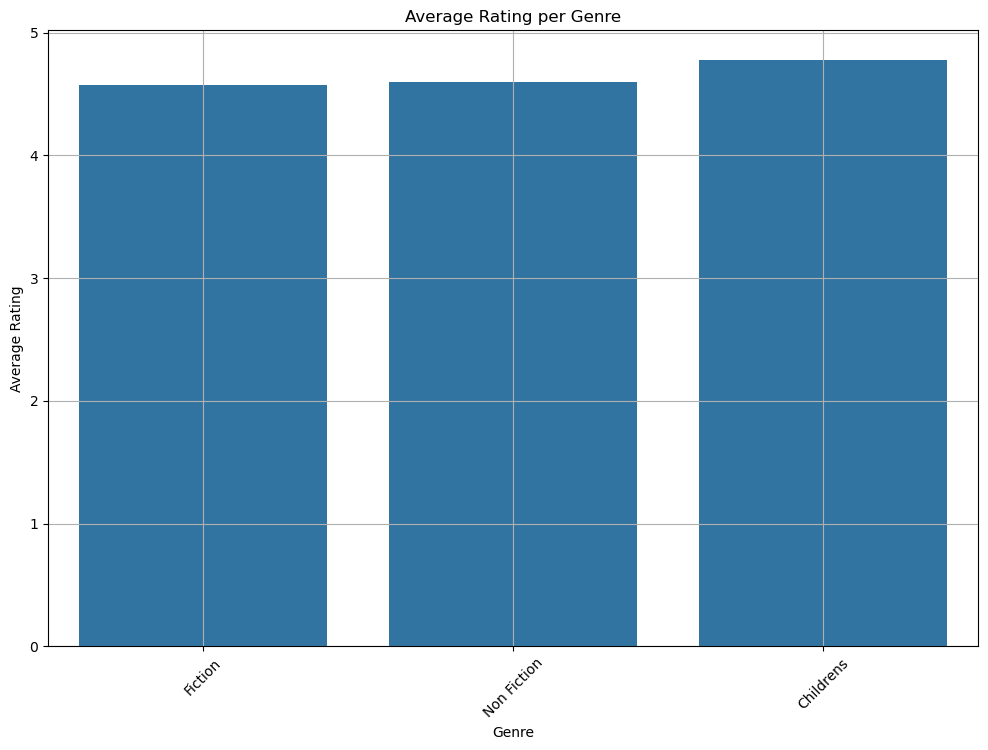

In [10]:
# Average rating per genre
plt.figure(figsize=(12, 8))
avg_rating_genre = books_df.groupby('genre')['rating'].mean().sort_values()
sns.barplot(x=avg_rating_genre.index, y=avg_rating_genre.values, )
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Trend over the years?

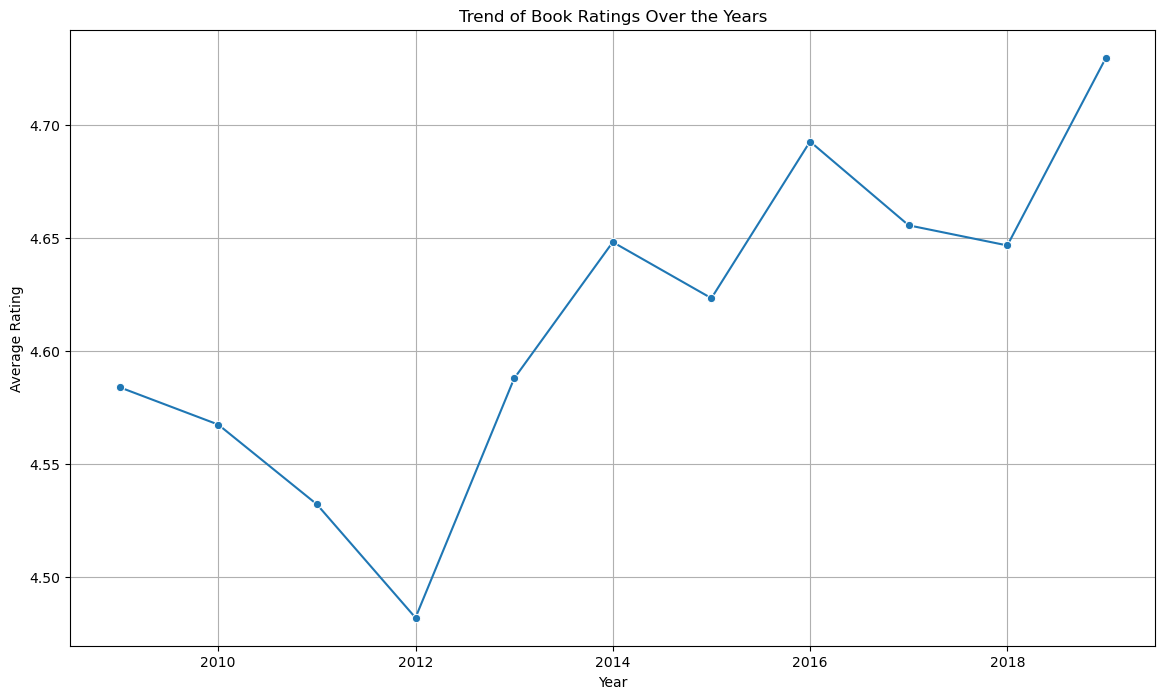

In [11]:
# Trend of book ratings over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='rating', data=books_df, marker='o', errorbar=None)
plt.title('Trend of Book Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()